In [41]:
import torch
import random

import sys
sys.path.append("../../../lib")
import utility

In [46]:
res = torch.load("../data/indirect_effect_1000_examples.pt")

In [43]:
num_layers = res[0][1][2]
aie_500 = utility.subject_corruption_AIE(random.sample(res, 500), num_layers)
aie_1000 = utility.subject_corruption_AIE(res, num_layers)
aies = [aie_500, aie_1000]

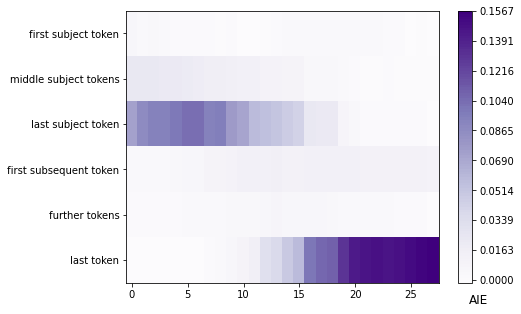

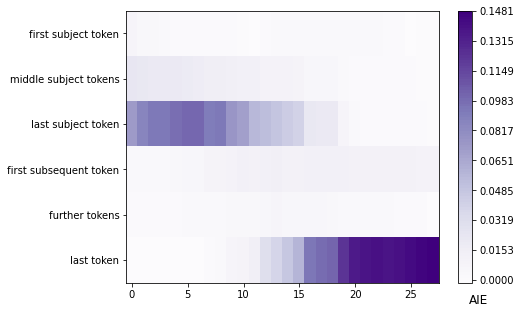

In [44]:
for aie in aies:
    x = num_layers
    y = ["first subject token", "middle subject tokens", "last subject token", \
                  "first subsequent token", "further tokens", "last token"]
    lower_bound = torch.min(aie).item()
    upper_bound = torch.max(aie).item()
    incr = (upper_bound - lower_bound) / 100
    title = "AIE"
    color_schema = "Purples"

    utility.plot_results(aie, x, y, lower_bound, upper_bound, incr, title, color_schema)